In [9]:
import math
import numpy as np
import pandas as pd
import csv
import statistics as stat
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
df = pd.read_csv('Sharp_cleaned.csv')

In [7]:
fields = df.drop(['LaunchDate', 'Buno', 'MC_x', 'MC_y', 'Pilot Rank'], axis=1).columns

In [10]:
mcData = df[fields]
mcData = shuffle(mcData)
eighty = math.floor(len(mcData)*.8)

XMC = mcData.drop('dam', axis=1)
XMC_train = XMC[:eighty] 
XMC_test = XMC[eighty:]

yMC = mcData['dam']
yMC_train = yMC[:eighty]
yMC_test = yMC[eighty:]
regMC = LogisticRegression().fit(XMC_train, yMC_train)

In [11]:
tagRanking = list(zip(df[fields], *regMC.coef_))
tags = pd.DataFrame(tagRanking)

In [12]:
def get_tags(t, n):
    t = t.sort_values([1], ascending=False)
    top_tags = list(t[0:n][0])
    return top_tags

In [13]:
# get top 30 tags
top_tags = get_tags(tags, 30)

## Results from logistic regression

In [14]:
MCpred = regMC.predict(XMC_test)

print(mean_squared_error(yMC_test, MCpred))
print(r2_score(yMC_test, MCpred))

0.14600740033420864
-0.17136730153065827


In [15]:
daysMC = 0
for i, j in zip(MCpred, yMC_test):
    daysMC += abs(i - j)
avgDaysMC = daysMC/len(MCpred)
avgDaysMC

0.14600740033420864

(array([3.3508e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

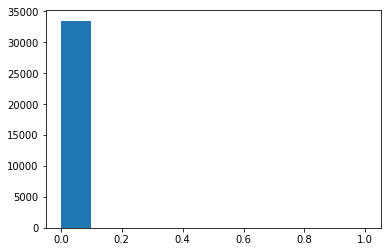

In [16]:
plt.hist(MCpred)

(array([28621.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4891.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

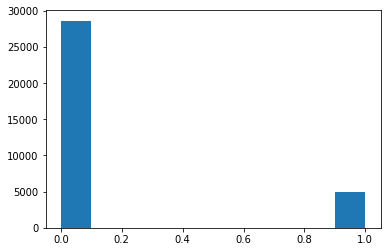

In [17]:
plt.hist(yMC_test)

## Cleaning up data

In [20]:
# make nan field and grab fields needed
flightDf = df
[str(i) for i in top_tags]
flight_fields = ['LaunchDate', 'Buno', 'TFT', 'Ship', 'Flights', 'Pilot Rank'] + top_tags + ['dam']
flightDf = flightDf[flight_fields]


### Only need for if using RNN and need null values

In [21]:
ship and dam will have 0 for null values, therefore each value is shifted up 

a = np.zeros(shape=(len(flightDf), 1))
flightDf['Nan'] = a


flight = list()
for index, row in flightDf.iterrows():
    flight.append(row)
    flight[-1]['Ship'] += 1
    flight[-1]['dam'] += 1
flightDf = pd.DataFrame(flight)
flightDf.head()

In [22]:
flightDf = flightDf.sort_values(['Buno', 'LaunchDate'])

## Seperate sharp data into diff file for each Buno (optional)

In [23]:
buno = set(flightDf['Buno'])
for i in buno:
    b = flightDf[flightDf['Buno'] == i]
    b.to_csv(f'Flights/Flight{i}.csv', index=False)

In [24]:
flightDf.to_csv(r'FlightCombined.csv', index=False)